In [3]:
# First Solution - Descriptive Analysys

ratings = open(r'C:\Users\Sanjana\ml-1m\ratings.dat')
rating_distribution = dict()
movieId_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[2] == 5:
        columns.append('High')
    elif columns[2] == 4 or columns[2] == 3:
        columns.append('Medium')
    else:
        columns.append('Low')

    if columns[1] in movieId_count:
        movieId_count[columns[1]] += 1
    else: 
        movieId_count[columns[1]] = 1

    if columns[4] in rating_distribution:
        rating_distribution[columns[4]] += 1
    else:
        rating_distribution[columns[4]] = 1

for rating_range in rating_distribution:
    print('{0} {1}'.format(rating_range, int(rating_distribution[rating_range] / sum(rating_distribution.values()) * 100)))

movies = open(r'C:\Users\Sanjana\ml-1m\movies.dat')
movieId_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieId_name[int(columns[0])] = columns[1]
    
sorted_counted_data = sorted(movieId_count.items(), key = lambda x:x[1], reverse=True)[:10]
for movieId, count in sorted_counted_data:
    print(movieId_name[movieId], count)

High 22
Medium 61
Low 16
American Beauty (1999) 3428
Star Wars: Episode IV - A New Hope (1977) 2991
Star Wars: Episode V - The Empire Strikes Back (1980) 2990
Star Wars: Episode VI - Return of the Jedi (1983) 2883
Jurassic Park (1993) 2672
Saving Private Ryan (1998) 2653
Terminator 2: Judgment Day (1991) 2649
Matrix, The (1999) 2590
Back to the Future (1985) 2583
Silence of the Lambs, The (1991) 2578


In [31]:
#Second solution- Genre Insights
import pandas as pd

data = movies = open(r'C:\Users\Sanjana\ml-1m\movies.dat')

df = pd.DataFrame(data, columns=["raw_data"])

df[['id', 'title', 'genres']] = df['raw_data'].str.split('::', expand=True)

genre_list = [genre for genres in df['genres'] for genre in genres.split('|')]

genre_counts = {}
for genre in genre_list:
    if genre in genre_counts:
        genre_counts[genre] += 1
    else:
        genre_counts[genre] = 1

genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=True)

print(genre_counts_df)

import pandas as pd
movies = pd.read_csv(
    r'C:\Users\Sanjana\ml-1m\movies.dat', 
    sep='::', 
    engine='python', 
    header=None, 
    names=['MovieID', 'Title', 'Genres'], 
    encoding='ISO-8859-1'  
)
ratings = pd.read_csv(
    r'C:\Users\Sanjana\ml-1m\ratings.dat', 
    sep='::', 
    engine='python', 
    header=None, 
    names=['UserID', 'MovieID', 'Rating', 'Timestamp'], 
    encoding='ISO-8859-1' 
)

merged_data = pd.merge(ratings, movies, on='MovieID')

merged_data['Genres'] = merged_data['Genres'].str.split('|')
merged_data = merged_data.explode('Genres')

average_ratings = merged_data.groupby('Genres').agg(
    Average_Rating=('Rating', 'mean'),
    Rating_Count=('Rating', 'count')
).reset_index()

high_to_low = average_ratings.sort_values(by='Average_Rating', ascending=False)

low_to_high = average_ratings.sort_values(by='Average_Rating', ascending=True)

print("Genres sorted by average rating (High to Low):")
print(high_to_low)

# Display results for low to hig
print("\nGenres sorted by average rating (Low to High):")
print(low_to_high)


            Genre  Count
31            War      1
33    Animation\n      3
32    Documentary      7
27       Thriller      9
34    Film-Noir\n     19
30        Fantasy     22
19        Musical     22
28      Film-Noir     25
18    Adventure\n     42
4       Fantasy\n     46
20      Mystery\n     49
25        Mystery     57
24        Crime\n     60
26        Romance     61
12       Action\n     65
29      Western\n     68
11   Children's\n     76
21         Sci-Fi     79
23      Musical\n     92
0       Animation    102
22         Horror    108
16  Documentary\n    120
17          War\n    142
9           Crime    151
1      Children's    175
15       Sci-Fi\n    197
14       Horror\n    235
3       Adventure    241
6       Romance\n    410
8          Action    438
13          Drama    452
10     Thriller\n    483
5          Comedy    575
2        Comedy\n    625
7         Drama\n   1151
Genres sorted by average rating (High to Low):
         Genres  Average_Rating  Rating_Count
9     F

In [35]:
#Third solution - User Engagement Analysis
import pandas as pd

users = pd.read_csv(
    r'C:\Users\Sanjana\ml-1m\users.dat',
    sep='::',
    engine='python',
    header=None,
    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
    encoding='ISO-8859-1'
)

ratings = pd.read_csv(
    r'C:\Users\Sanjana\ml-1m\ratings.dat',
    sep='::',
    engine='python',
    header=None,
    names=['UserID', 'MovieID', 'Rating', 'Timestamp'],
    encoding='ISO-8859-1'
)

merged_data = pd.merge(ratings, users, on='UserID')

# Task 1: Identify the most active users (profession) based on the number of ratings they’ve given
user_activity = merged_data.groupby('Occupation')['Rating'].count().reset_index()
user_activity.columns = ['Occupation', 'Number_of_Ratings']
user_activity = user_activity.sort_values(by='Number_of_Ratings', ascending=False)

# Display the most active occupations
print("Most Active Occupations Based on Number of Ratings Given:")
print(user_activity)

# Task 2: Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences
# Average rating by age group
average_rating_age = merged_data.groupby('Age')['Rating'].mean().reset_index()
average_rating_age.columns = ['Age Group', 'Average Rating']
print("\nAverage Rating by Age Group:")
print(average_rating_age)

# Average rating by gender
average_rating_gender = merged_data.groupby('Gender')['Rating'].mean().reset_index()
average_rating_gender.columns = ['Gender', 'Average Rating']
print("\nAverage Rating by Gender:")
print(average_rating_gender)

# Average rating by occupation
average_rating_occupation = merged_data.groupby('Occupation')['Rating'].mean().reset_index()
average_rating_occupation.columns = ['Occupation', 'Average Rating']
print("\nAverage Rating by Occupation:")
print(average_rating_occupation)






Most Active Occupations Based on Number of Ratings Given:
    Occupation  Number_of_Ratings
4            4             131032
0            0             130499
7            7             105425
1            1              85351
17          17              72816
20          20              60397
12          12              57214
2            2              50068
14          14              49109
16          16              46021
6            6              37205
3            3              31623
10          10              23290
15          15              22951
5            5              21850
11          11              20563
19          19              14904
13          13              13754
18          18              12086
9            9              11345
8            8               2706

Average Rating by Age Group:
   Age Group  Average Rating
0          1        3.549520
1         18        3.507573
2         25        3.545235
3         35        3.618162
4         45       

In [37]:
#Fourth Solution - Rating Distribution by Demographics
import pandas as pd

users = pd.read_csv(r'C:\Users\Sanjana\ml-1m\users.dat', sep='::', engine='python', 
                    header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='ISO-8859-1')

ratings = pd.read_csv(r'C:\Users\Sanjana\ml-1m\ratings.dat', sep='::', engine='python', 
                      header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='ISO-8859-1')

movies = pd.read_csv(r'C:\Users\Sanjana\ml-1m\movies.dat', sep='::', engine='python', 
                     header=None, names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')

merged_data = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

# Task 1: Average rating by age, gender, and occupation
print("Average Rating by Age:")
print(merged_data.groupby('Age')['Rating'].mean())

print("\nAverage Rating by Gender:")
print(merged_data.groupby('Gender')['Rating'].mean())

print("\nAverage Rating by Occupation:")
print(merged_data.groupby('Occupation')['Rating'].mean())

# Task 2: Average rating by genre and age/occupation
merged_data['Genres'] = merged_data['Genres'].str.split('|')
merged_data = merged_data.explode('Genres')

print("\nAverage Rating by Genre and Age:")
print(merged_data.groupby(['Age', 'Genres'])['Rating'].mean())

print("\nAverage Rating by Genre and Occupation:")
print(merged_data.groupby(['Occupation', 'Genres'])['Rating'].mean())


Average Rating by Age:
Age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: Rating, dtype: float64

Average Rating by Gender:
Gender
F    3.620366
M    3.568879
Name: Rating, dtype: float64

Average Rating by Occupation:
Occupation
0     3.537544
1     3.576642
2     3.573081
3     3.656516
4     3.536793
5     3.537529
6     3.661578
7     3.599772
8     3.466741
9     3.656589
10    3.532675
11    3.617371
12    3.654001
13    3.781736
14    3.618481
15    3.689774
16    3.596575
17    3.613574
18    3.530117
19    3.414050
20    3.497392
Name: Rating, dtype: float64

Average Rating by Genre and Age:
Age  Genres    
1    Action        3.506385
     Adventure     3.449975
     Animation     3.476113
     Children's    3.241642
     Comedy        3.497491
                     ...   
56   Romance       3.816531
     Sci-Fi        3.497746
     Thriller      3.719749
     War           4.067285
     Western       3.792198
Name

In [39]:
#Fifth Solution - Top Performers

merged_data = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

# Task 1:
min_ratings = 50
movie_ratings = merged_data.groupby('MovieID').agg(
    average_rating=('Rating', 'mean'),
    num_ratings=('Rating', 'count')
).reset_index()

top_rated_movies = movie_ratings[movie_ratings['num_ratings'] >= min_ratings].sort_values('average_rating', ascending=False)
top_rated_movies = pd.merge(top_rated_movies, movies, on='MovieID')

print("Top Rated Movies (with at least 50 ratings):")
print(top_rated_movies[['Title', 'average_rating', 'num_ratings']])

# Task 2:
top_rated_movies['Release_Year'] = top_rated_movies['Title'].str.extract(r'\((\d{4})\)')
top_rated_movies['Genres'] = top_rated_movies['Genres'].str.split('|')
top_rated_movies = top_rated_movies.explode('Genres')

print("\nGenre Distribution of Top-Rated Movies:")
print(top_rated_movies.groupby('Genres').size().sort_values(ascending=False))

print("\nRelease Year Distribution of Top-Rated Movies:")
print(top_rated_movies['Release_Year'].value_counts().sort_index())


Top Rated Movies (with at least 50 ratings):
                                                  Title  average_rating  \
0                                        Sanjuro (1962)        4.608696   
1     Seven Samurai (The Magnificent Seven) (Shichin...        4.560510   
2                      Shawshank Redemption, The (1994)        4.554558   
3                                 Godfather, The (1972)        4.524966   
4                                 Close Shave, A (1995)        4.520548   
...                                                 ...             ...   
2509                           Battlefield Earth (2000)        1.611111   
2510                               Iron Eagle IV (1995)        1.603448   
2511                             Problem Child 2 (1991)        1.555556   
2512                               Meatballs III (1987)        1.553846   
2513                                      Kazaam (1996)        1.466667   

      num_ratings  
0              69  
1             

In [45]:
#Sixth solution - Exploring Long Tail

merged_data = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

#Task 1
movie_ratings = merged_data.groupby('MovieID').agg(num_ratings=('Rating', 'count')).reset_index()

long_tail_movies = movie_ratings[movie_ratings['num_ratings'] < 10]
print(f"\nMovies with very few ratings (less than 10): {len(long_tail_movies)}")
print(long_tail_movies.head())

# Task 2
popular_movies = movie_ratings[movie_ratings['num_ratings'] >= 50]

long_tail_movies = pd.merge(long_tail_movies, movies, on='MovieID')
popular_movies = pd.merge(popular_movies, movies, on='MovieID')

print("\nCharacteristics of Less-Rated Movies vs Popular Ones:")
print("Genres of less-rated movies:")
print(long_tail_movies['Genres'].value_counts().head())

print("\nGenres of popular movies:")
print(popular_movies['Genres'].value_counts().head())

long_tail_movies['Release_Year'] = long_tail_movies['Title'].str.extract(r'\((\d{4})\)')
popular_movies['Release_Year'] = popular_movies['Title'].str.extract(r'\((\d{4})\)')

print("\nRelease Year of less-rated movies:")
print(long_tail_movies['Release_Year'].value_counts().head())

print("\nRelease Year of popular movies:")
print(popular_movies['Release_Year'].value_counts().head())




Movies with very few ratings (less than 10): 446
    MovieID  num_ratings
32       33            4
36       37            8
51       53            8
54       56            9
57       59            8

Characteristics of Less-Rated Movies vs Popular Ones:
Genres of less-rated movies:
Genres
Drama           164
Comedy           66
Documentary      37
Horror           21
Comedy|Drama     21
Name: count, dtype: int64

Genres of popular movies:
Genres
Drama             401
Comedy            339
Horror            102
Comedy|Drama      100
Comedy|Romance     95
Name: count, dtype: int64

Release Year of less-rated movies:
Release_Year
1995    59
1998    56
1996    51
1997    49
1994    37
Name: count, dtype: int64

Release Year of popular movies:
Release_Year
1996    192
1999    191
1998    183
1997    170
1995    167
Name: count, dtype: int64


In [72]:
#Seventh solution- Tag Analysis
import pandas as pd

movies_path = r'C:\Users\Sanjana\ml-1m\movies.dat'
movies_columns = ["MovieID", "Title", "Genres"]
movies_df = pd.read_csv(movies_path, sep="::", names=movies_columns, engine="python", encoding="ISO-8859-1")

genres_split = movies_df["Genres"].str.split('|', expand=True).stack()
genres_split.name = "Tag"

expanded_movies_data = movies_df.join(genres_split.reset_index(drop=True))
tag_frequency = genres_split.value_counts()
tags_by_genre = expanded_movies_data.groupby("Genres")["Tag"].value_counts().reset_index(name="Tag_Count")

print("Most Frequently Used Tags:")
print(tag_frequency.head()) 

print("\nTags Consistency with Genres:")
print(tags_by_genre.head(20))  



Most Frequently Used Tags:
Tag
Drama       1603
Comedy      1200
Action       503
Thriller     492
Romance      471
Name: count, dtype: int64

Tags Consistency with Genres:
              Genres          Tag  Tag_Count
0             Action       Comedy         18
1             Action        Drama         12
2             Action     Thriller         11
3             Action       Action          7
4             Action   Children's          3
5             Action       Sci-Fi          3
6             Action    Adventure          2
7             Action        Crime          2
8             Action      Musical          2
9             Action      Mystery          2
10            Action  Documentary          1
11            Action      Fantasy          1
12            Action      Romance          1
13  Action|Adventure        Crime          5
14  Action|Adventure       Comedy          4
15  Action|Adventure        Drama          4
16  Action|Adventure       Action          3
17  Action|Advent

In [55]:
pip install pandas matplotlib seaborn


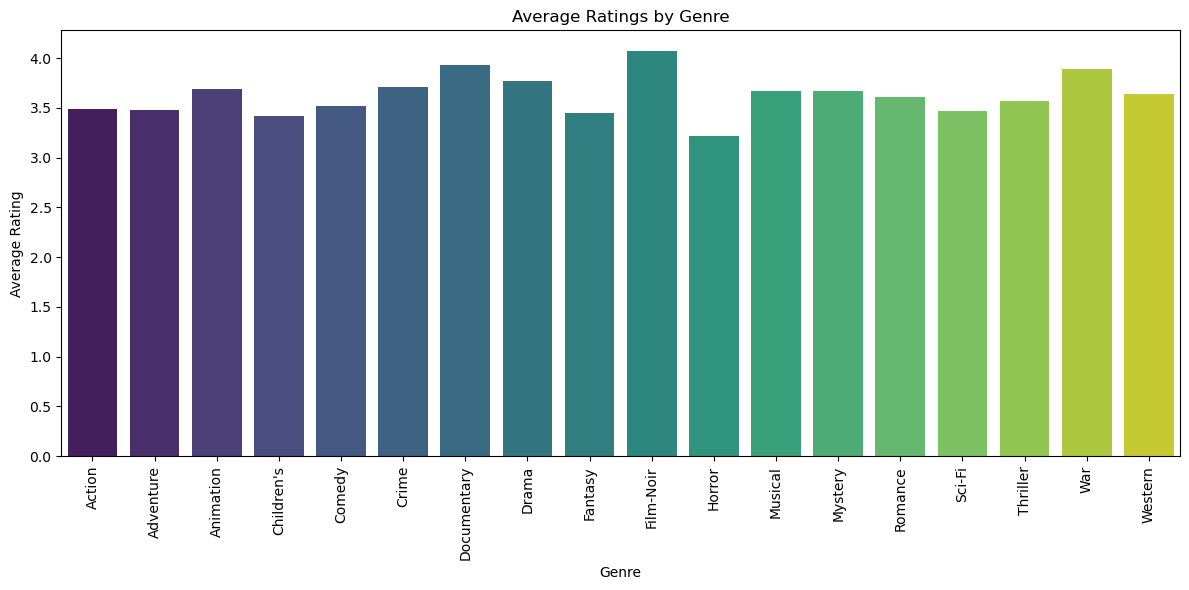

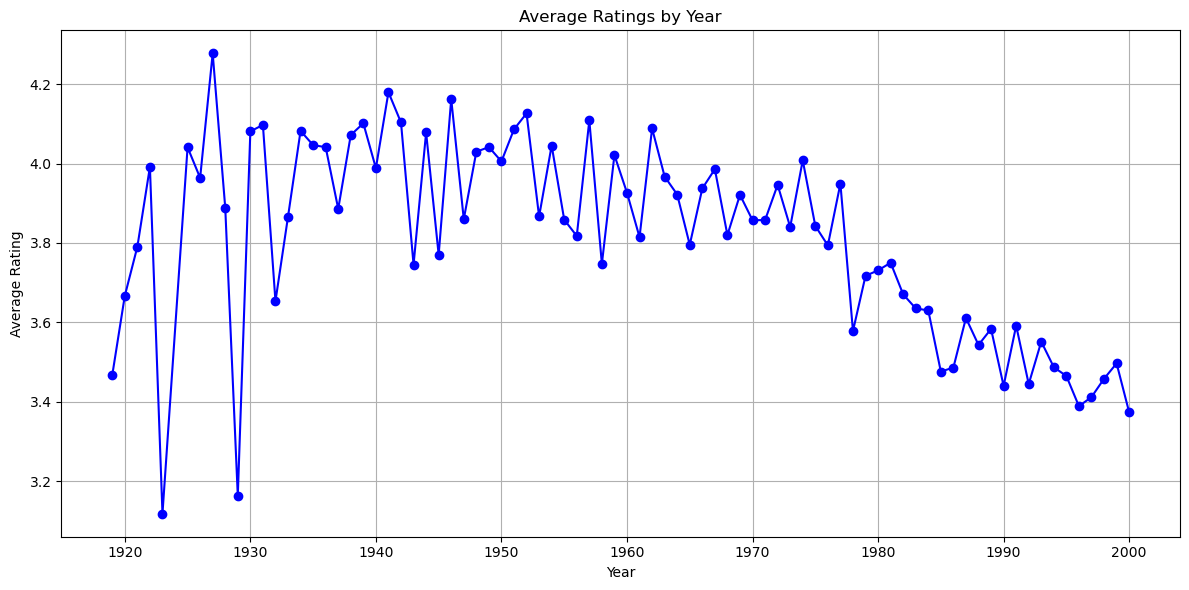

In [90]:
#Eighth solution-Visualization Projects
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ratings_path = r'C:\Users\Sanjana\ml-1m\ratings.dat'
movies_path = r'C:\Users\Sanjana\ml-1m\movies.dat'

ratings_columns = ["UserID", "MovieID", "Rating", "Timestamp"]
movies_columns = ["MovieID", "Title", "Genres"]

ratings_df = pd.read_csv(ratings_path, sep="::", names=ratings_columns, engine="python", encoding="ISO-8859-1")
movies_df = pd.read_csv(movies_path, sep="::", names=movies_columns, engine="python", encoding="ISO-8859-1")

merged_data = pd.merge(ratings_df, movies_df, on="MovieID")

merged_data["Year"] = merged_data["Title"].str.extract(r"\((\d{4})\)")
merged_data["Year"] = pd.to_numeric(merged_data["Year"], errors="coerce")  # Convert to numeric

genre_data = merged_data["Genres"].str.get_dummies("|")

ratings_by_genre = genre_data.mul(merged_data["Rating"], axis=0).sum() / genre_data.sum()

ratings_by_year = merged_data.groupby("Year")["Rating"].mean()

# Plot average ratings by genre
plt.figure(figsize=(12, 6))
sns.barplot(
    x=ratings_by_genre.index,
    y=ratings_by_genre.values,
    palette="viridis",
    hue=ratings_by_genre.index,  # Assign `x` to `hue` to satisfy the warning
    legend=False  # Disable legend to avoid clutter
)
plt.xticks(rotation=90)
plt.title("Average Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

# Plot average ratings by year
plt.figure(figsize=(12, 6))
ratings_by_year.plot(kind="line", marker="o", color="b")
plt.title("Average Ratings by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid()
plt.tight_layout()
plt.show()



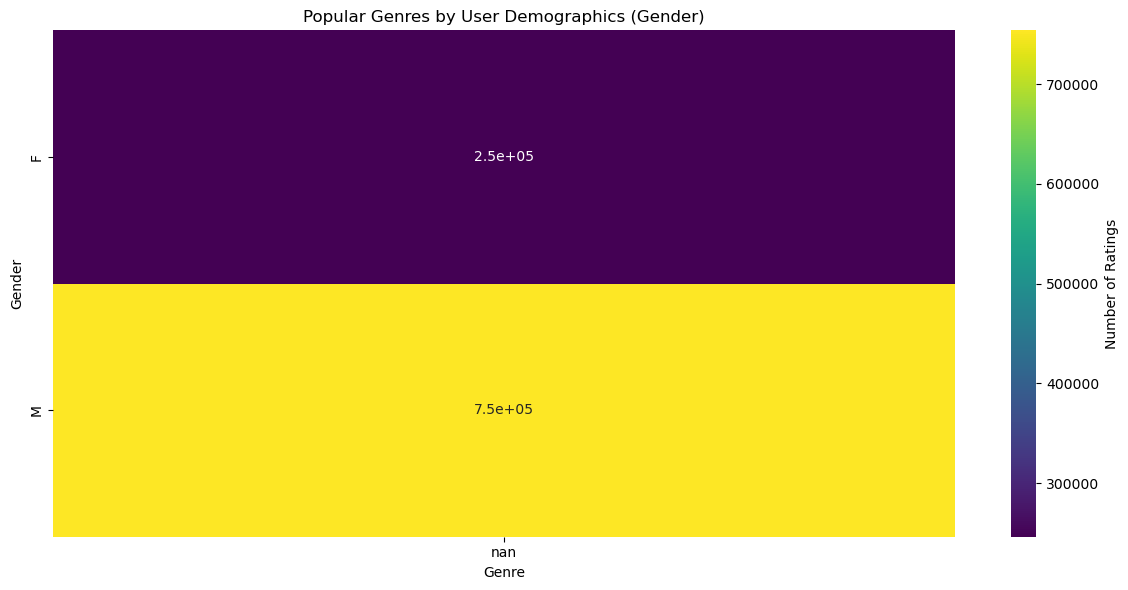

In [108]:
# Task 2: Popular Genres by User Demographics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

user_ratings_with_movies['Genres'] = user_ratings_with_movies['Genres'].astype(str)

user_ratings_with_movies['Genres'] = user_ratings_with_movies['Genres'].str.split('|')

demographics_genres = user_ratings_with_movies.explode('Genres')

demographics_genres = demographics_genres.groupby(['Gender', 'Genres'])['Rating'].count().reset_index(name='Count')

heatmap_data = demographics_genres.pivot_table(index='Gender', columns='Genres', values='Count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="viridis", cbar_kws={'label': 'Number of Ratings'})
plt.title("Popular Genres by User Demographics (Gender)")
plt.xlabel("Genre")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()



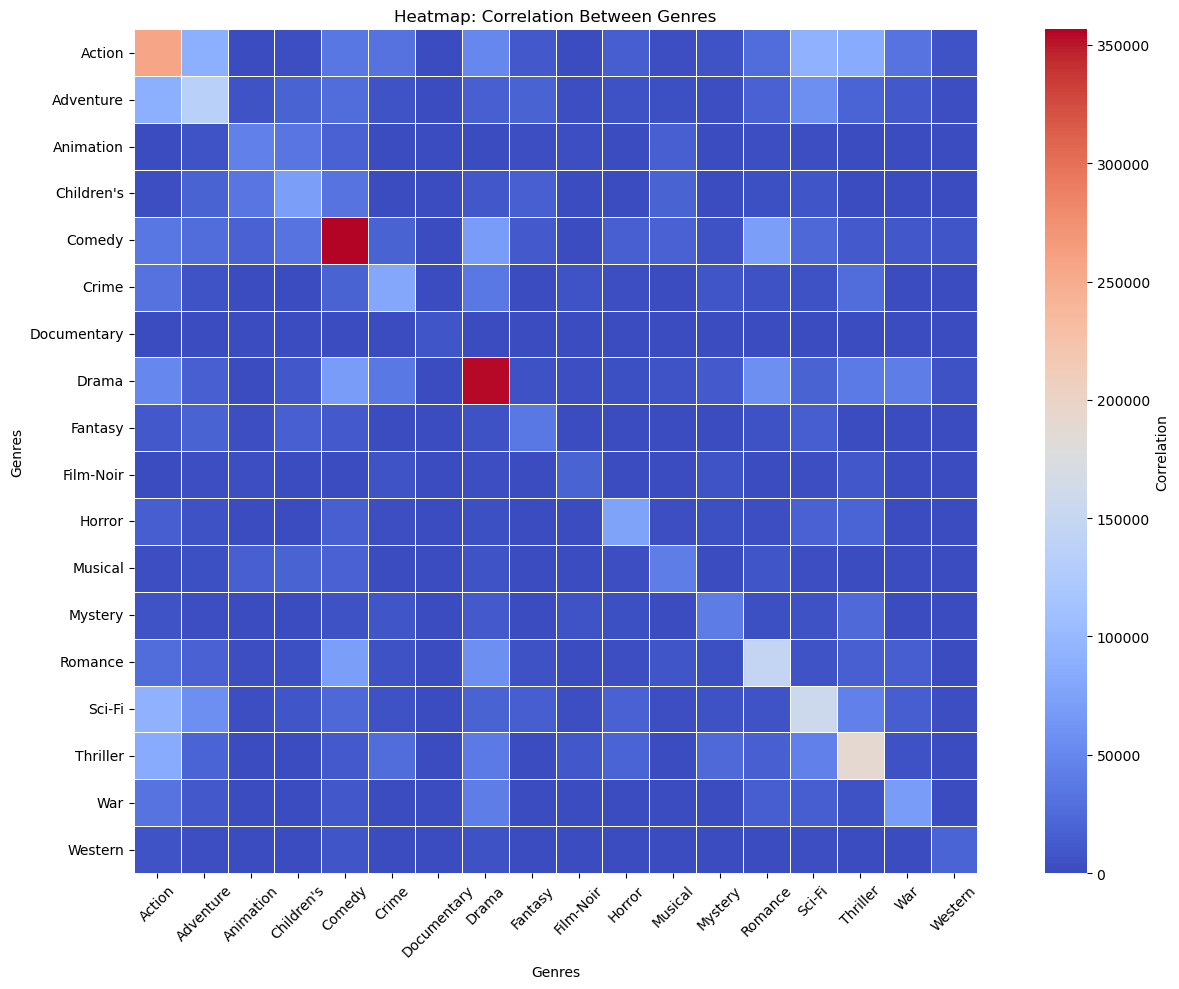

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix for genres and ratings
genre_rating_correlation = genre_data.corrwith(merged_data["Rating"]).to_frame(name="Correlation")

# Transform the correlation data for heatmap compatibility
heatmap_data = genre_data.T.dot(genre_data)
heatmap_data.index = genre_data.columns
heatmap_data.columns = genre_data.columns

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    annot=False, 
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'},
    square=True
)
plt.title("Heatmap: Correlation Between Genres")
plt.xlabel("Genres")
plt.ylabel("Genres")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

